In [11]:
# I - : Importing  the library and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
from keras.models import Sequential,load_model
from keras.layers import Dropout,Dense,LSTM, GRU,Bidirectional,Conv1D,MaxPooling1D,GlobalMaxPooling1D
#from tensorflow.keras import Input,layers
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,make_scorer
#import tensorflow.experimental.numpy as tnp
#tnp.experimental_enable_numpy_behavior()

In [12]:
# II - : Importing the training set

In [13]:
dataset=pd.read_csv("https://raw.githubusercontent.com/oreilly-mlsec/book-resources/599669c7124dffb65ea7f6e0b7626df32496b1d6/chapter3/datasets/cpu-utilization/cpu-full-b.csv", sep=",")

In [14]:
# III -  split of data Test & Training

# III.1 - : Size the data Test, Training
train_size=int(len(dataset)*.85)
test_size=int(len(dataset)*.15)
x_trainning,x_testing=dataset.iloc[0:train_size],dataset.iloc[(train_size+1):(train_size+test_size)]

In [15]:

# III.3 - : Preparing data for timesteps (lags)

#THE TWO FUNCTIONS WE WILL BE USEFUL FOR THE FOLLOWING

def preparation_data(data,lags):
        x_train = []
        y_train = []
        for i in range(lags,len(data)):
            x_train.append(data[i-lags:i, 0])
            y_train.append(data[i, 0])
        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        return x_train, y_train

def normalisationPreparationDonnee(data,lags):
    data=data['cpu'].values
    sc = MinMaxScaler(feature_range = (0, 1))
    #sc=StandardScaler()
    data1= data.reshape(-1,1)
    data2 = sc.fit_transform(data1)
    def preparation_data():
        x_train = []
        y_train = []
        for i in range(lags,len(data2)):
            x_train.append(data2[i-lags:i, 0])
            y_train.append(data2[i, 0])
        return np.array(x_train), np.array(y_train)
    x_train, y_train = preparation_data()
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train


In [16]:
# IV - TRAINING OF DIFFERENTS MODELS

lags=5

x_train, y_train = normalisationPreparationDonnee(x_trainning, lags)
x_test, y_test = normalisationPreparationDonnee(x_testing, lags)


In [17]:

# IV.1 - : Entrainement du modele RNN-LSTM

# IV.1.1 - : Initialising the RNN-LSTM

start=time()
modelLSTM = Sequential()
modelLSTM.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
modelLSTM.add(LSTM(units = 128, return_sequences = True))
modelLSTM.add(LSTM(units = 64, return_sequences = True))
modelLSTM.add(LSTM(units = 32, return_sequences = True))
modelLSTM.add(LSTM(units = 64, return_sequences = True))
modelLSTM.add(LSTM(units = 128, return_sequences = True))
modelLSTM.add(LSTM(units = 100))
modelLSTM.add(Dense(units = 1))
modelLSTM.compile(optimizer = 'adam', loss = 'mse',
              metrics=['accuracy'])
print(modelLSTM.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 128)            117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 64)             49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 32)             12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 64)             24832     
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 128)            98816     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               9

In [19]:
start=time()
historylstm=modelLSTM.fit(x_train, y_train, epochs = 500,batch_size = 5,
                  validation_split=0.20,verbose=0)

elapsed=time()-start

print('duree totale est de :',elapsed/60)
# 27 minutes

duree totale est de : 15.239627722899119


In [ ]:
# plot_model(modelLSTM,show_shapes=True, to_file='regressor.png')

# plot_model(modelLSTM,to_file='regressor.png')

<ipython-input-20-7da19b5fce8e>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


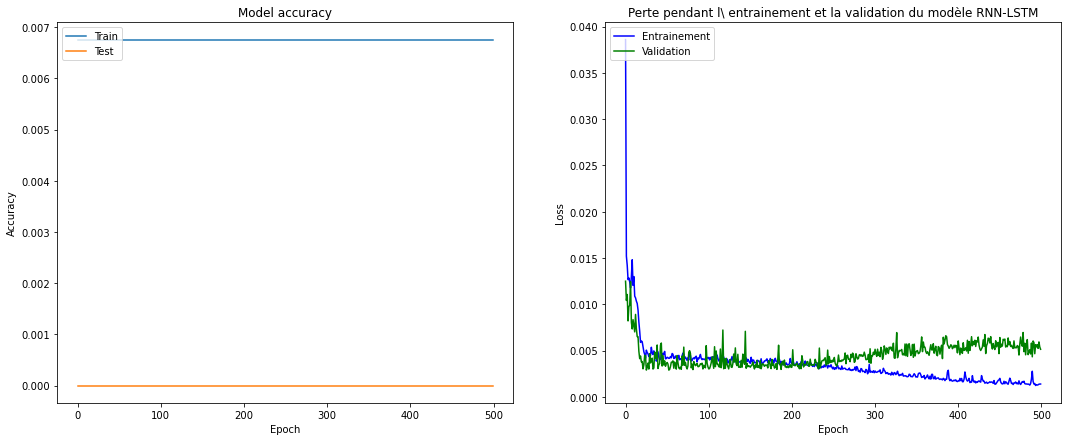

In [20]:
# IV.1.2 - :Plot training & validation accuracy values
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.plot(historylstm.history['accuracy'])
plt.plot(historylstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(historylstm.history['loss'],'b',label='Entrainement')
plt.plot(historylstm.history['val_loss'],'green',label='Validation')
plt.title('Perte pendant l\ ''entrainement et la validation du modèle RNN-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrainement', 'Validation'], loc='upper left')


In [21]:
# IV.1.3 - : Saving and importing the model

# modelLSTM.save('modelRnnLSTMProj.h5') 

#creates a HDF5 file 'my_model.h5' et model = load_model('modelRnnLSTMProjetSecurite.h5')
# pour le detruire del model  # deletes the existing model
# modelLSTM = load_model('modelRnnLSTMProj.h5')

La R^2-Squared(r2_score) du modèle Erreur données Entrainement est : 0.966642873603136
La MAE modèle Erreur données Entrainement est de: 0.02806560228054982 
La MSE modèle Erreur données Entrainement est de: 0.0020696264819696874 
RMSE est:0.04549314763752545
La R^2-Squared(r2_score) du modèle Erreur données test est : 0.74555587414682
La MAE modèle Erreur données test est de: 0.09077873790776861 
La MSE modèle Erreur données test est de: 0.019785139490304953 
RMSE est:0.14065965836125494
Les pertes sur les données enrainement sont: 
loss: 0.21%
accuracy: 0.54%
Les pertes sur les données Test sont: 
loss: 1.98%
accuracy: 4.30%


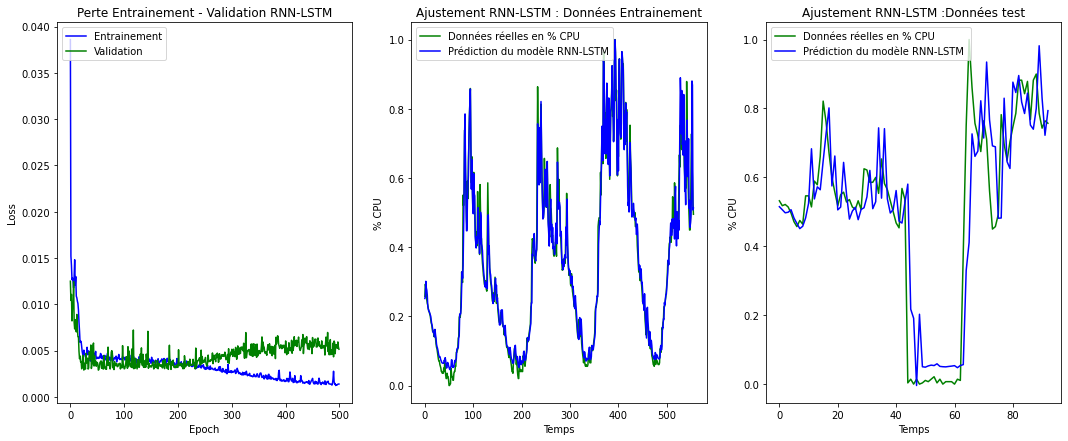

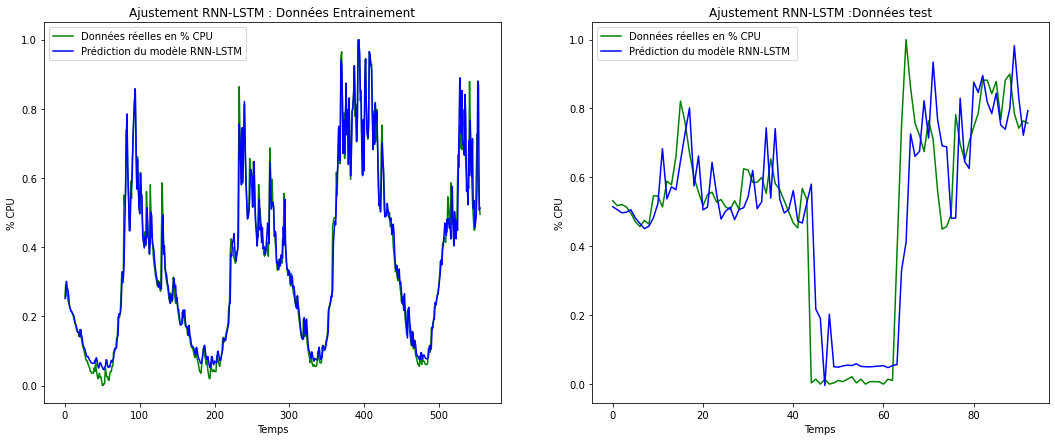

In [22]:
#  IV.1.4 - : Calculating Errors and Viewing Model Fits
# on Training and Test data

def ErreurPrediction(Nommodele,data,prediction ):
    print('La R^2-Squared(r2_score) du modèle {} est : {}'.format(Nommodele,r2_score(data,prediction)))
    print('La MAE modèle {} est de: {} '.format(Nommodele,mean_absolute_error(data,prediction)))
    print('La MSE modèle {} est de: {} '.format(Nommodele,mean_squared_error(data,prediction)))
    print('RMSE est:{}'.format(np.sqrt(mean_squared_error(data,prediction))))
   

def LossAccuracy(nomDonnées,modelLSTM,x_test,y_test):
    score = modelLSTM.evaluate(x_test, y_test,verbose=0)
    erreur=modelLSTM.metrics_names
    print('Les pertes sur les données {} sont: '.format(nomDonnées))
    print("%s: %.2f%%" % (erreur[0], score[0]*100))
    print("%s: %.2f%%" % (erreur[1], score[1]*100))


#  IV.1.5 - : Viewing two-by-two graphs

def Affichage(historylstm,modelLSTM,Nommodele):
    y_pred_train=modelLSTM.predict(x_train)
    y_pred_test=modelLSTM.predict(x_test)
    plt.figure(figsize=(18,7))
    plt.subplot(1,3,1)
    plt.plot(historylstm.history['loss'],'b',label='Entrainement')
    plt.plot(historylstm.history['val_loss'],'green',label='Validation')
    plt.title('Perte Entrainement - Validation {}'.format(Nommodele))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Entrainement', 'Validation'], loc='upper left')
    plt.subplot(1,3,2)
    plt.plot(y_train, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_train, color = 'blue', label = 'Prédiction du modèle {}'.format(Nommodele))
    plt.title('Ajustement {} : Données Entrainement'.format(Nommodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(y_test, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_test, color = 'blue', label = 'Prédiction du modèle {} '.format(Nommodele))
    plt.title('Ajustement {} :Données test'.format(Nommodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    
def Affichage_Model(modelLSTM,NomDumodele):
    y_pred_train=modelLSTM.predict(x_train)
    y_pred_test=modelLSTM.predict(x_test)
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    plt.plot(y_train, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_train, color = 'blue', label = 'Prédiction du modèle {}'.format(NomDumodele))
    plt.title('Ajustement {} : Données Entrainement'.format(NomDumodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(y_test, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_test, color = 'blue', label = 'Prédiction du modèle {} '.format(NomDumodele))
    plt.title('Ajustement {} :Données test'.format(NomDumodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    
ErreurPrediction("Erreur données Entrainement",y_train,modelLSTM.predict(x_train))
ErreurPrediction("Erreur données test",y_test,modelLSTM.predict(x_test))

LossAccuracy("enrainement",modelLSTM,x_train,y_train)
LossAccuracy("Test", modelLSTM,x_test,y_test)

Affichage(historylstm,modelLSTM,"RNN-LSTM")

Affichage_Model(modelLSTM,"RNN-LSTM")

In [23]:
#  IV.2 - : Training of the RNN-GRU model  

#  IV.2.1 - : Initialization of the Gru model

start=time()
modelGRU = Sequential()
modelGRU.add(GRU(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
modelGRU.add(GRU(units = 128, return_sequences = True))
modelGRU.add(GRU(units = 64, return_sequences = True))
modelGRU.add(GRU(units = 32, return_sequences = True))
modelGRU.add(GRU(units = 64, return_sequences = True))
modelGRU.add(GRU(units = 128, return_sequences = True))
modelGRU.add(GRU(units = 100))
modelGRU.add(Dense(units = 1))
modelGRU.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
              metrics=['accuracy'])
print(modelGRU.summary())

historygru=modelGRU.fit(x_train, y_train, epochs = 500, batch_size = 5,
                        validation_split=0.20,verbose=0)

elapsed=time()-start

print('duree totale est de :',elapsed/60)
# 21 minutes


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 100)            30900     
_________________________________________________________________
gru_1 (GRU)                  (None, 5, 128)            88320     
_________________________________________________________________
gru_2 (GRU)                  (None, 5, 64)             37248     
_________________________________________________________________
gru_3 (GRU)                  (None, 5, 32)             9408      
_________________________________________________________________
gru_4 (GRU)                  (None, 5, 64)             18816     
_________________________________________________________________
gru_5 (GRU)                  (None, 5, 128)            74496     
_________________________________________________________________
gru_6 (GRU)                  (None, 100)              

In [24]:
#  IV.2.2 - : Enregistrement et importation  du model

# modelGRU.save('modelRnnGRUProj.h5') 

#creates a HDF5 file 'my_model.h5' et model = load_model('modelRnnLSTMProjetSecurite.h5')
# pour le detruire del model  # deletes the existing model
# modelGRU = load_model('modelRnnGRUProj.h5')

La R^2-Squared(r2_score) du modèle Erreur données Entrainement est : 0.9780735891979585
La MAE modèle Erreur données Entrainement est de: 0.01914404597233289 
La MSE modèle Erreur données Entrainement est de: 0.001360413361467424 
RMSE est:0.03688378182165467
La R^2-Squared(r2_score) du modèle Erreur données test est : 0.7260390759728148
La MAE modèle Erreur données test est de: 0.09383725982199434 
La MSE modèle Erreur données test est de: 0.021302732293762453 
RMSE est:0.1459545555772839
Les pertes sur les données enrainement sont: 
loss: 0.14%
accuracy: 0.54%
Les pertes sur les données Test sont: 
loss: 1.98%
accuracy: 4.30%


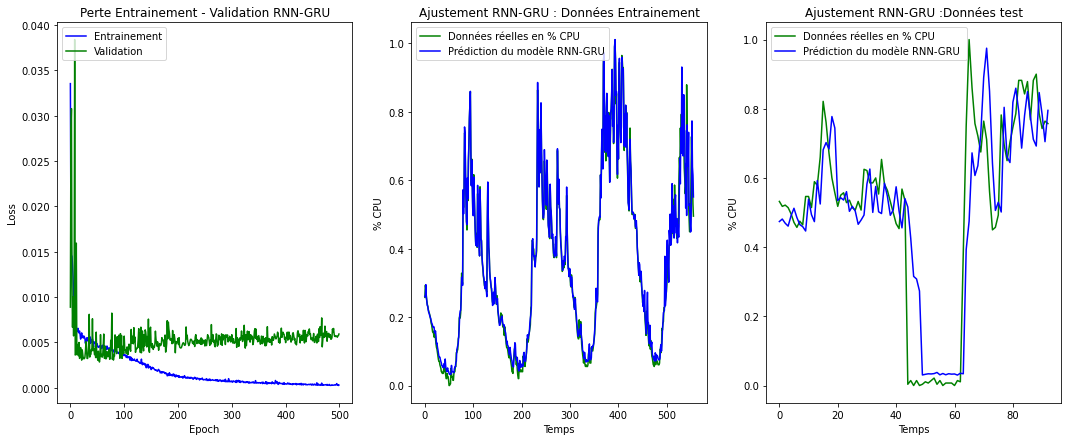

In [25]:
#  IV.2.3 - : Calcul des erreurs & Plot training & validation accuracy values

ErreurPrediction("Erreur données Entrainement",y_train,modelGRU.predict(x_train))
ErreurPrediction("Erreur données test",y_test,modelGRU.predict(x_test))

LossAccuracy("enrainement",modelGRU,x_train,y_train)
LossAccuracy("Test", modelLSTM,x_test,y_test)
Affichage(historygru,modelGRU,"RNN-GRU")

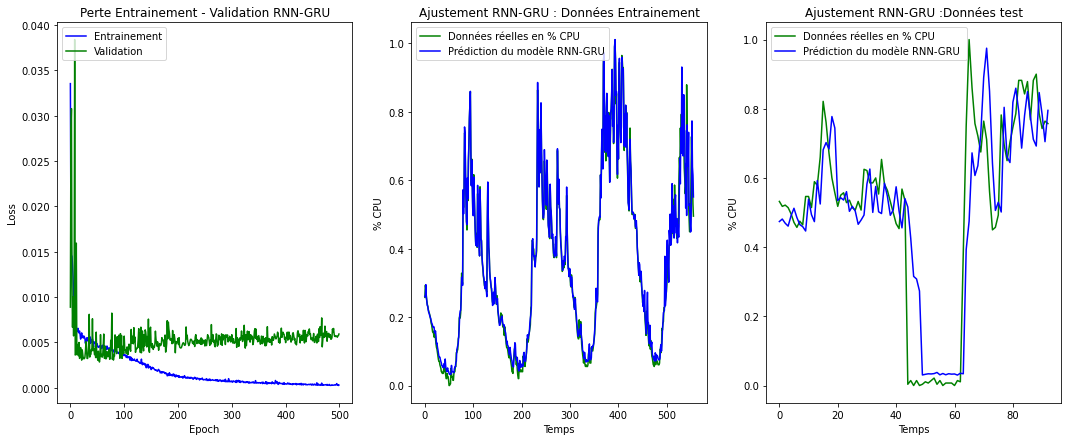

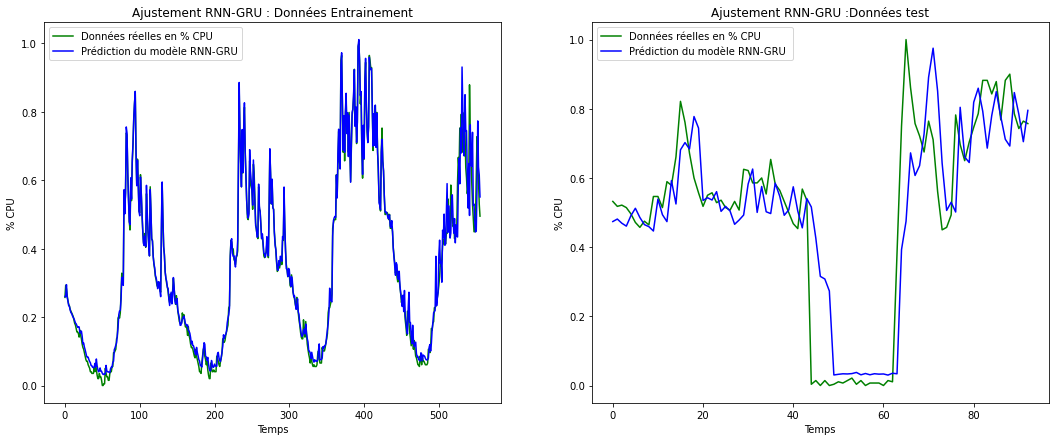

In [26]:
Affichage(historygru,modelGRU,"RNN-GRU")

Affichage_Model(modelGRU,"RNN-GRU")

In [27]:
# IV.3 - : Entrainement du model RNN bidirectionnel

#IV.3.1 - : Initialising AND TRAINING the RNN bidirectionnel


start=time()
modelbidir = Sequential()
modelbidir.add(Bidirectional(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1],1))))
modelbidir.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
modelbidir.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
modelbidir.add(Bidirectional(LSTM(units = 32, return_sequences = True)))
modelbidir.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
modelbidir.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
modelbidir.add(Bidirectional(LSTM(units = 100)))
modelbidir.add(Dense(units = 1))
modelbidir.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
              metrics=['accuracy'])

historybidir=modelbidir.fit(x_train, y_train, epochs = 500, batch_size = 5,
                       validation_split=0.20,verbose=0 )

elapsed=time()-start
print(modelbidir.summary())
print('duree totale est de :',elapsed/60)
# 38 minutes



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 200)            81600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 256)            336896    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 5, 128)            164352    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 5, 64)             41216     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 5, 128)            66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 5, 256)            263168    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)              

In [28]:
# IV.3.2 - :  Enregistrement et importation  du model

# modelbidir.save('modelRnnBidirectionalProj.h5') 
#creates a HDF5 file 'my_model.h5' et model = load_model('modelRnnLSTMProjetSecurite.h5')
# pour le detruire del model  # deletes the existing model
# modelbidir = load_model('modelRnnBidirectionalProj.h5')


La R^2-Squared(r2_score) du modèle Erreur données Entrainement est : 0.9811397350928971
La MAE modèle Erreur données Entrainement est de: 0.01633235671551461 
La MSE modèle Erreur données Entrainement est de: 0.0011701758492114445 
RMSE est:0.034207833155747304
La R^2-Squared(r2_score) du modèle Erreur données test est : 0.7672261234092552
La MAE modèle Erreur données test est de: 0.07496248292758168 
La MSE modèle Erreur données test est de: 0.018100098018000117 
RMSE est:0.1345366047512725
Les pertes sur les données enrainement sont: 
loss: 0.12%
accuracy: 0.54%
Les pertes sur les données Test sont: 
loss: 1.81%
accuracy: 5.38%


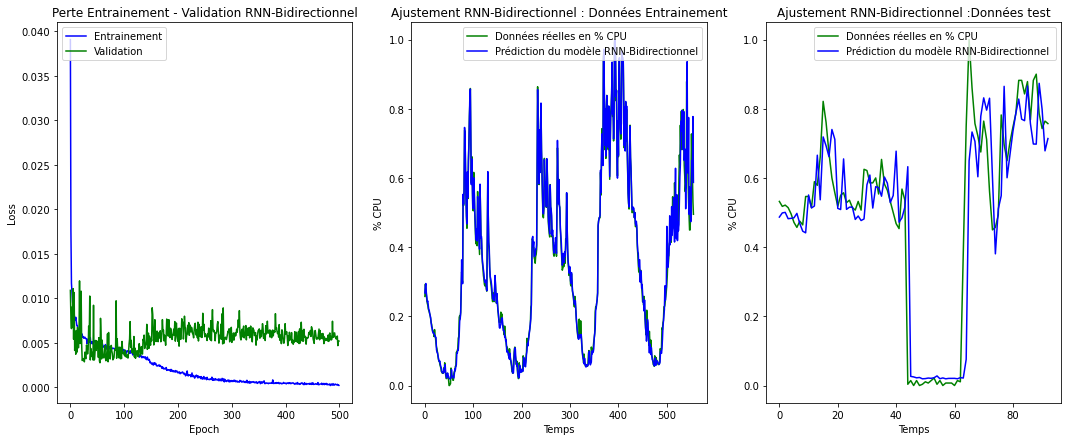

In [29]:
# IV.3.3 - : Calcul des erreurs & Plot training & validation loss values

ErreurPrediction("Erreur données Entrainement",y_train,modelbidir.predict(x_train))
ErreurPrediction("Erreur données test",y_test,modelbidir.predict(x_test))

LossAccuracy("enrainement",modelbidir,x_train,y_train)
LossAccuracy("Test", modelbidir,x_test,y_test)
Affichage(historybidir,modelbidir,"RNN-Bidirectionnel")

In [30]:

# IV.4 - : Entrainement du modèle ConvNet1D

#IV.4.1 - : Initialising and training the ConvNet1D # forme (samples,time,features)

start=time()
modelConvNet1D = Sequential()
modelConvNet1D.add(Conv1D(100, kernel_size=1,activation='tanh',input_shape=(x_train.shape[1], 1)))
modelConvNet1D.add(Conv1D(128, kernel_size=1,activation='tanh'))
modelConvNet1D.add(MaxPooling1D(pool_size=2,strides=1,padding='same'))
modelConvNet1D.add(Conv1D(64, kernel_size=1,activation='tanh'))
modelConvNet1D.add(Conv1D(32, kernel_size=1,activation='tanh'))
modelConvNet1D.add(Conv1D(64, kernel_size=1,activation='tanh'))
modelConvNet1D.add(Conv1D(128, kernel_size=1,activation='tanh'))
modelConvNet1D.add(MaxPooling1D(pool_size=2,strides=1,padding='same'))
modelConvNet1D.add(GlobalMaxPooling1D())
#modelConvNet1D.add(Flatten()) # pas besoin si globalMaxPooling1D est deja là
modelConvNet1D.add(Dense(128,activation='tanh'))
modelConvNet1D.add(Dense(100,activation='tanh'))
modelConvNet1D.add(Dense(1))
modelConvNet1D.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
              metrics=['accuracy'])

historyConvNet1D=modelConvNet1D.fit(x_train, y_train, epochs = 500, batch_size = 5,
                           validation_split=0.20,verbose=0)

elapsed=time()-start
print(modelConvNet1D.summary())
print('duree totale est de :',elapsed/60)
# 3 minutes



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 100)            200       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            12928     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 64)             8256      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 32)             2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5, 64)             2112      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 5, 128)           

La R^2-Squared(r2_score) du modèle Erreur données Entrainement est : 0.9343189078784182
La MAE modèle Erreur données Entrainement est de: 0.04503966352078907 
La MSE modèle Erreur données Entrainement est de: 0.0040751510187729025 
RMSE est:0.06383690953337968
La R^2-Squared(r2_score) du modèle Erreur données test est : 0.7440342368138961
La MAE modèle Erreur données test est de: 0.08140110837241289 
La MSE modèle Erreur données test est de: 0.019903459403506355 
RMSE est:0.14107962079445194
Les pertes sur les données enrainement sont: 
loss: 0.41%
accuracy: 0.54%
Les pertes sur les données Test sont: 
loss: 1.99%
accuracy: 4.30%


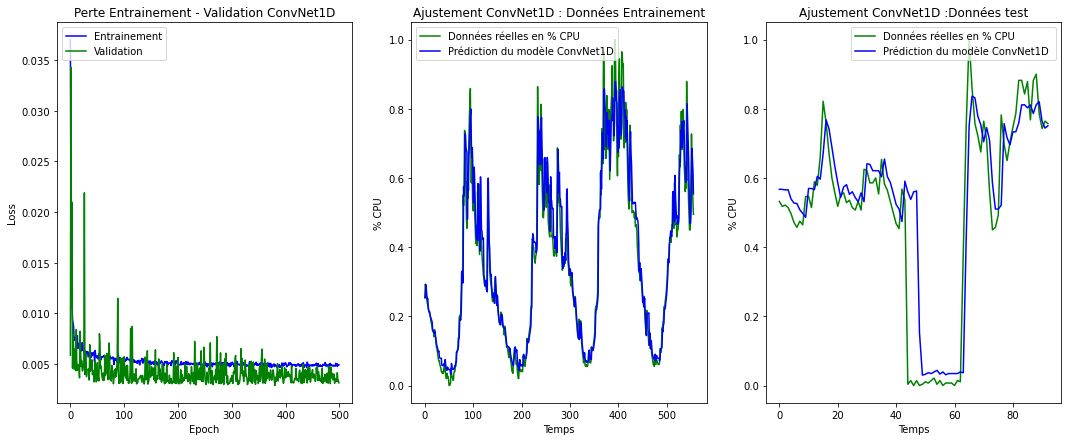

In [31]:
# IV.4.2 - :  Enregistrement et importation  du model

# modelConvNet1D.save('modelConvNet1DProj.h5') 
#creates a HDF5 file 'my_model.h5' et model = load_model('modelRnnLSTMProjetSecurite.h5')
# pour le detruire del model  # deletes the existing model
# modelConvNet1D = load_model('modelConvNet1DProj.h5')

# IV.4.3 - : Calcul des erreurs & Plot training & validation loss values

ErreurPrediction("Erreur données Entrainement",y_train,modelConvNet1D.predict(x_train))
ErreurPrediction("Erreur données test",y_test,modelConvNet1D.predict(x_test))

LossAccuracy("enrainement",modelConvNet1D,x_train,y_train)
LossAccuracy("Test", modelConvNet1D,x_test,y_test)
Affichage(historyConvNet1D,modelConvNet1D,"ConvNet1D")
